# Import

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
import math
from bs4 import BeautifulSoup
from statsmodels.stats import diagnostic
from scipy import stats
import math
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import networkx as nx
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
# from sklearn.preprocessing import OneHotEncoder
# from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve

%matplotlib inline
sns.set_context('notebook')

In [2]:
baseball = pd.read_csv("01 - Handling data/Data/baseball.csv", index_col='id')
segments = pd.read_csv("01 - Handling data/Data/transit_segments.csv")
cdystonia = pd.read_csv("01 - Handling data/Data/cdystonia.csv", index_col=None)
vessels = pd.read_csv("01 - Handling data/Data/vessel_information.csv", index_col='mmsi')

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')

# 1 - Handling Data

In [5]:
bacteria = pd.Series([632, 1638, 569, 115],
                     index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [6]:
data = pd.DataFrame({'value': [632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient': [1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum': ['Firmicutes', 'Proteobacteria', 'Actinobacteria',
                                'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,value,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


### Get DF

In [7]:
type(data[['value']])

pandas.core.frame.DataFrame

### Get Serie

In [8]:
type(data.value)

pandas.core.series.Series

### Get Row

In [9]:
# With labels as index
data.loc[3]

value                115
patient                1
phylum     Bacteroidetes
Name: 3, dtype: object

In [10]:
#With integer location as index
data.iloc[3]

value                115
patient                1
phylum     Bacteroidetes
Name: 3, dtype: object

In [11]:
baseball.loc[89347, ['h', 'X2b', 'X3b', 'hr']]

h      126
X2b     18
X3b      3
hr       4
Name: 89347, dtype: object

In [12]:
baseball.loc[:89347, 'hr']

id
88641     1
88643     0
88645     0
88649     0
88650     0
88652     6
88653    15
88662     0
89177     0
89178     1
89330    10
89333     0
89334     1
89335     0
89336     0
89337     4
89338     0
89339     0
89340     0
89341     0
89343     0
89345     0
89347     4
Name: hr, dtype: int64

In [13]:
baseball.iloc[:5, 5:8]

,g,ab,r
id,,,
88641,19,50,6
88643,31,2,0
88645,62,0,0
88649,20,3,0
88650,33,6,0


### Copy to not have a view of the DF

In [14]:
vals = data.value.copy()

### Filter DF

In [15]:
data[data['phylum'].apply(lambda x: x.endswith('bacteria')) & data['value'].apply(lambda x: x > 1000)]

,value,patient,phylum
1,1638,1,Proteobacteria
5,1130,2,Proteobacteria


### Drop a line or a row

In [16]:
treatment = pd.Series([0] * 4 + [1] * 2)
data['treatment'] = treatment
#Columns
data_nomonth = data.drop('treatment', axis=1)
#Rows
data_nomonth.drop(0)
#na
data.dropna(how='all')  #how=all make it drop only if all col as nan

,value,patient,phylum,treatment
0,632,1,Firmicutes,0.0
1,1638,1,Proteobacteria,0.0
2,569,1,Actinobacteria,0.0
3,115,1,Bacteroidetes,0.0
4,433,2,Firmicutes,1.0
5,1130,2,Proteobacteria,1.0
6,754,2,Actinobacteria,NaN
7,555,2,Bacteroidetes,NaN


### Have a look at external CSV

In [17]:
!head Data/microbiome.csv

head: cannot open 'Data/microbiome.csv' for reading: No such file or directory


### Load CSV

In [18]:
pd.read_csv("01 - Handling data/Data/microbiome.csv",
            header=None,  #Don't use the first line of the csv as column index
            sep='\s+',  #separator are whitespaces
            index_col=['Patient', 'Taxon'],  #use Patient and Taxon as index
            skiprows=[3, 4, 6],  #Don't load those line from csv
            nrows=10,  #Only load 10 first rows of csv
            na_values=['?', -99999],  #specify the char ? and number -99999 to be considered as NA
            )

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\xagao\AppData\Local\Temp\ipykernel_2044\3948407883.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',#separator are whitespaces
C:\Users\xagao\AppData\Local\Temp\ipykernel_2044\3948407883.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',#separator are whitespaces


ValueError: Index Patient invalid

### Load Excel

In [ ]:
df = pd.read_excel('01 - Handling data/Data/microbiome_MID2.xls', sheet_name='Sheet 1', header=None)

### Check if index is unique

In [ ]:
df.index.is_unique

### Query a DF

In [19]:
min_ab = 500

baseball.query('ab > @min_ab')
grass_pokemon = pokemon_df.query(
    "(`Class 1` == 'Grass' & `Class 2` != 'Rock') | (`Class 2` == 'Grass' & `Class 1` != 'Rock')")

NameError: name 'pokemon_df' is not defined

### Operations

In [20]:
len(baseball[baseball.team.isin(['LAN', 'SFN'])])

15

In [21]:
hr2007 = baseball.loc[baseball.year == 2007, 'hr']
hr2007[hr2007.notnull()]

id
89177     0
89178     1
89330    10
89333     0
89334     1
         ..
89525     0
89526     0
89530     3
89533    13
89534     0
Name: hr, Length: 92, dtype: int64

In [22]:
hr2006 = baseball.loc[baseball.year == 2006, 'hr']
hr2007.add(hr2006, fill_value=0).head(20)  # Fill Nan value as 0.0

id
88641     1.0
88643     0.0
88645     0.0
88649     0.0
88650     0.0
88652     6.0
88653    15.0
88662     0.0
89177     0.0
89178     1.0
89330    10.0
89333     0.0
89334     1.0
89335     0.0
89336     0.0
89337     4.0
89338     0.0
89339     0.0
89340     0.0
89341     0.0
Name: hr, dtype: float64

In [23]:
(baseball.hr - baseball.hr.max()).head(20)

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
88652   -29
88653   -20
88662   -35
89177   -35
89178   -34
89330   -25
89333   -35
89334   -34
89335   -35
89336   -35
89337   -31
89338   -35
89339   -35
89340   -35
89341   -35
Name: hr, dtype: int64

In [24]:
baseball['obp'] = baseball.apply(
    lambda p: (p.h + p.bb + p.hbp) / (p.ab + p.bb + p.hbp + p.sf) if (p.ab + p.bb + p.hbp + p.sf) != 0.0 else 0.0,
    axis=1)

In [25]:
bacteria.fillna(0)

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

In [26]:
data.fillna({'year': 2013, 'treatment': 2})

,value,patient,phylum,treatment
0,632,1,Firmicutes,0.0
1,1638,1,Proteobacteria,0.0
2,569,1,Actinobacteria,0.0
3,115,1,Bacteroidetes,0.0
4,433,2,Firmicutes,1.0
5,1130,2,Proteobacteria,1.0
6,754,2,Actinobacteria,2.0
7,555,2,Bacteroidetes,2.0


In [27]:
data['treatment'].fillna(2, inplace=True)
data

,value,patient,phylum,treatment
0,632,1,Firmicutes,0.0
1,1638,1,Proteobacteria,0.0
2,569,1,Actinobacteria,0.0
3,115,1,Bacteroidetes,0.0
4,433,2,Firmicutes,1.0
5,1130,2,Proteobacteria,1.0
6,754,2,Actinobacteria,2.0
7,555,2,Bacteroidetes,2.0


In [28]:
bacteria.fillna(method='bfill')  #Fill by interpolation

C:\Users\xagao\AppData\Local\Temp\ipykernel_2044\2655686349.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bacteria.fillna(method='bfill') #Fill by interpolation


Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

### Sorting

In [29]:
baseball.sort_index(ascending=False, axis=1)

,year,team,stint,so,sh,sf,sb,rbi,r,player,...,hr,hbp,h,gidp,g,cs,bb,ab,X3b,X2b
id,,,,,,,,,,,,,,,,,,,,,
88641,2006,CHN,2,4.0,3.0,0.0,1.0,2.0,6,womacto01,...,1,0.0,14,0.0,19,1.0,4,50,0,1
88643,2006,BOS,1,1.0,0.0,0.0,0.0,0.0,0,schilcu01,...,0,0.0,1,0.0,31,0.0,0,2,0,0
88645,2006,NYA,1,0.0,0.0,0.0,0.0,0.0,0,myersmi01,...,0,0.0,0,0.0,62,0.0,0,0,0,0
88649,2006,MIL,1,2.0,0.0,0.0,0.0,0.0,0,helliri01,...,0,0.0,0,0.0,20,0.0,0,3,0,0
88650,2006,NYA,1,4.0,0.0,0.0,0.0,0.0,0,johnsra05,...,0,0.0,1,0.0,33,0.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89525,2007,FLO,2,0.0,0.0,0.0,0.0,0.0,0,benitar01,...,0,0.0,0,0.0,34,0.0,0,0,0,0
89526,2007,SFN,1,0.0,0.0,0.0,0.0,0.0,0,benitar01,...,0,0.0,0,0.0,19,0.0,0,0,0,0
89530,2007,HOU,1,74.0,4.0,1.0,6.0,25.0,38,ausmubr01,...,3,6.0,82,11.0,117,1.0,37,349,3,16


In [30]:
baseball[['player', 'sb', 'cs']].sort_values(ascending=[False, True],
                                             by=['sb', 'cs']).head(10)

,player,sb,cs
id,,,
89378,sheffga01,22.0,5.0
89430,loftoke01,21.0,4.0
89347,vizquom01,14.0,6.0
89463,greensh01,11.0,1.0
88652,finlest01,7.0,0.0
89462,griffke02,6.0,1.0
89530,ausmubr01,6.0,1.0
89466,gonzalu01,6.0,2.0
89521,bondsba01,5.0,0.0


### Summarization

In [31]:
baseball.mean(numeric_only=True, axis=1)

id
88641    105.716667
88643    102.125000
88645    103.450000
88649    101.600000
88650    102.558333
            ...    
89525    102.150000
89526    101.350000
89530    139.215903
89533    137.569583
89534    102.306818
Length: 100, dtype: float64

In [32]:
baseball.hr.cov(baseball.X2b)

69.07646464646454

### Plot

<Axes: >

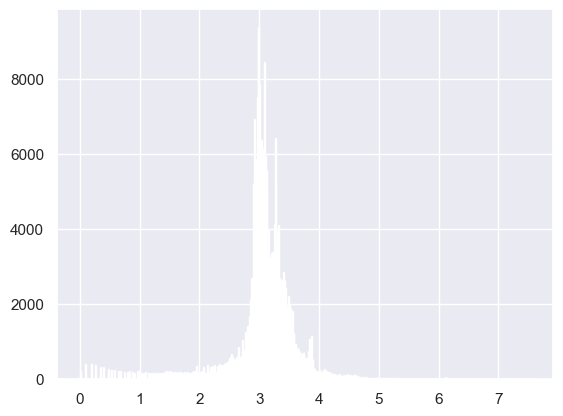

In [33]:
segments.seg_length.apply(np.log).hist(bins=500)

### Parse Date

In [34]:
segments = pd.read_csv("01 - Handling data/Data/transit_segments.csv", parse_dates=['st_time', 'end_time'],
                       date_format='%m/%d/%y %H:%M', nrows=1000)

### Merge

In [35]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3)) + list(range(3)),
                        score=np.random.random(size=6)))

pd.merge(df1, df2, how='outer')

,id,age,score
0,0,30,0.728407
1,0,30,0.681214
2,1,29,0.389395
3,1,29,0.961186
4,2,29,0.951859
5,2,29,0.917768
6,3,24,NaN


### Concatenation

In [36]:
mb1 = pd.read_excel('01 - Handling data/Data/microbiome_MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('01 - Handling data/Data/microbiome_MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.columns = mb2.columns = ['Count']
mb1.index.name = mb2.index.name = 'Taxon'

pd.concat([mb1, mb2], axis=1)  #axis = 1 -> column-wise

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3.0,10.0
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3.0,9.0
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7.0,9.0
...,...,...
"Bacteria ""Proteobacteria"" Gammaproteobacteria Oceanospirillales Oceanospirillales_incertae_sedis Spongiispira",NaN,1.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Hydrogenovibrio",NaN,9.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Sulfurivirga",NaN,1.0


### Reshape

In [37]:
data.stack()  #.unstack() to undo

0  value                   632
   patient                   1
   phylum           Firmicutes
   treatment               0.0
1  value                  1638
   patient                   1
   phylum       Proteobacteria
   treatment               0.0
2  value                   569
   patient                   1
   phylum       Actinobacteria
   treatment               0.0
3  value                   115
   patient                   1
   phylum        Bacteroidetes
   treatment               0.0
4  value                   433
   patient                   2
   phylum           Firmicutes
   treatment               1.0
5  value                  1130
   patient                   2
   phylum       Proteobacteria
   treatment               1.0
6  value                   754
   patient                   2
   phylum       Actinobacteria
   treatment               2.0
7  value                   555
   patient                   2
   phylum        Bacteroidetes
   treatment               2.0
dtype: o

In [38]:
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [39]:
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', aggfunc="max").head(10)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57

In [40]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,52,53,42,30,22,54,66,48,28
M,18,29,30,18,11,33,6,58,33


### Drop Duplicated

In [41]:
df.drop_duplicates(['names'])

NameError: name 'df' is not defined

### Values Replacements

In [ ]:
cdystonia['treatment'] = cdystonia.treat.map({'Placebo': 0, '5000U': 1, '10000U': 2})
cdystonia.treat.replace({0: 'Placebo', 1: '5000U', 2: '10000U'}).head(10)

### Categorical Data

In [ ]:
# Indicator Values
pd.get_dummies(vessels.head(10).type)

In [ ]:
pd.Categorical(cdystonia.treat)

In [ ]:
cdystonia['treat'] = cdystonia.treat.astype('category')
cdystonia.treat.describe()

In [ ]:
cdystonia.treat.cat.codes.head(20)  # Category object mapped to int

### Discretization

In [ ]:
pd.cut(cdystonia.age, [20, 30, 40, 50, 60, 70, 80, 90])[:20]

In [42]:
pd.cut(cdystonia.age, [20, 30, 40, 50, 60, 70, 80, 90], right=False)[:20]  #specify where to open interval

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
5     [60, 70)
6     [70, 80)
7     [70, 80)
8     [70, 80)
9     [70, 80)
10    [70, 80)
11    [70, 80)
12    [60, 70)
13    [60, 70)
14    [60, 70)
15    [60, 70)
16    [60, 70)
17    [60, 70)
18    [50, 60)
19    [50, 60)
Name: age, dtype: category
Categories (7, interval[int64, left]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

In [43]:
pd.cut(cdystonia.age, [20, 40, 60, 80, 90], labels=['young', 'middle-aged', 'old', 'really old'])[:20]

0             old
1             old
2             old
3             old
4             old
5             old
6             old
7             old
8             old
9             old
10            old
11            old
12            old
13            old
14            old
15            old
16            old
17            old
18    middle-aged
19    middle-aged
Name: age, dtype: category
Categories (4, object): ['young' < 'middle-aged' < 'old' < 'really old']

In [44]:
pd.qcut(cdystonia.age, 4)[:20]  #4 quantiles

0     (56.0, 65.0]
1     (56.0, 65.0]
2     (56.0, 65.0]
3     (56.0, 65.0]
4     (56.0, 65.0]
5     (56.0, 65.0]
6     (65.0, 83.0]
7     (65.0, 83.0]
8     (65.0, 83.0]
9     (65.0, 83.0]
10    (65.0, 83.0]
11    (65.0, 83.0]
12    (56.0, 65.0]
13    (56.0, 65.0]
14    (56.0, 65.0]
15    (56.0, 65.0]
16    (56.0, 65.0]
17    (56.0, 65.0]
18    (56.0, 65.0]
19    (56.0, 65.0]
Name: age, dtype: category
Categories (4, interval[float64, right]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

In [45]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])  #custom quantiles
quantiles[:20]

0     (1.7, 455.8]
1     (1.7, 455.8]
2     (1.7, 455.8]
3     (1.7, 455.8]
4     (1.7, 455.8]
5     (1.7, 455.8]
6     (1.7, 455.8]
7     (1.7, 455.8]
8     (1.7, 455.8]
9     (1.7, 455.8]
10    (1.7, 455.8]
11    (1.7, 455.8]
12    (1.7, 455.8]
13    (1.7, 455.8]
14    (1.7, 455.8]
15    (1.7, 455.8]
16    (1.7, 455.8]
17    (1.7, 455.8]
18    (1.7, 455.8]
19    (1.7, 455.8]
Name: seg_length, dtype: category
Categories (5, interval[float64, right]): [(0.999, 1.1] < (1.1, 1.7] < (1.7, 455.8] < (455.8, 456.801] < (456.801, 701.6]]

### Take random samples

In [46]:
vessels.sample(n=10, replace=True)  #weights = df['TotalPop'] can sample with weight

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
308232000,1,Koa Spirit,N,Bahamas (Commonwealth of the),Foreign,1,248.0,248.0,1,Tanker
538004517,1,Silver Master,N,Marshall Islands (Republic of the),Foreign,1,280.0,280.0,1,Cargo
235395000,1,Cec Force,N,United Kingdom of Great Britain and Northern I...,Foreign,1,101.0,101.0,1,Cargo
366896390,1,Dredge 55,N,United States of America,Domestic,1,54.0,54.0,1,Dredging
413131000,1,Xin Yang Shan,N,China (People's Republic of),Foreign,1,263.0,263.0,1,Cargo
636091315,1,Janus,N,Liberia (Republic of),Foreign,1,199.0,199.0,1,Cargo
372584000,1,Stolt Swazi,N,Panama (Republic of),Foreign,1,144.0,144.0,1,Tanker
538090270,1,Sharon Sea,N,Marshall Islands (Republic of the),Foreign,1,200.0,200.0,1,Tanker
367376440,2,367376440/Peter F Gellatly,N,United States of America,Domestic,2,1.0/33.0,33.0,2,Towing/Unknown


### Aggregate and GroupBy

In [47]:
cdystonia_grouped = cdystonia.drop(columns=['treat', 'sex']).groupby(cdystonia.patient)
cdystonia_grouped.agg('mean').head()
cdystonia_grouped.mean().head()  #equivalent
cdystonia_grouped.mean().add_suffix('_mean').head()

,patient_mean,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean
patient,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667


In [48]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5).head(10)

patient
1     34.0
2     50.5
3     30.5
4     61.5
5     48.5
6     48.0
7     42.0
8     32.5
9     35.5
10    20.5
Name: twstrs, dtype: float64

In [49]:
cdystonia.drop(columns=['treat', 'sex']).groupby(['week', 'site']).mean().head()

patient  obs   id        age     twstrs
week site                                         
0    1         6.5  1.0  6.5  59.000000  43.083333
     2        19.5  1.0  7.5  53.928571  51.857143
     3        32.5  1.0  6.5  51.500000  38.750000
     4        42.5  1.0  4.5  59.250000  48.125000
     5        49.5  1.0  3.5  51.833333  49.333333

In [50]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

In [51]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments.head(15)

names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     41           Ron G/Us Navy Warship 103/Us Warship 103        62.6
     43           Ron G/Us Navy Warship 103/Us Warship 103        59.1
310  51                                           Arabella        77.4

In [52]:
average_by_region = country_features.groupby("world_region")['happiness_score'].agg(
    ['mean', 'size'])  #Can aggregate on multiples functions
average_by_region.sort_values("mean", ascending=False)

NameError: name 'country_features' is not defined

In [53]:
for idx, row in country_features[country_features.literacy == 100].iterrows():  # iterrows super useful
    print("{} - {} ({})".format(row.world_region, row.country, row.happiness_score))

NameError: name 'country_features' is not defined

# 2 - Data from the Web

In [54]:
import requests
import math
from bs4 import BeautifulSoup

In [55]:
r = requests.get('https://httpbin.org/html')
# Extract the header
soup = BeautifulSoup(r.text, 'html.parser')
soup.h1

<h1>Herman Melville - Moby-Dick</h1>

In [56]:
all_links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(all_links)))
external_links = 0
for link in all_links:
    if (link.get('href') and not link.get('href').startswith('http://dblp.uni-trier.de/')
            and link.get('href').startswith('http')):  # just an example, you may need more checks
        external_links += 1

print('... and {0} of them point to external websites.'.format(external_links))

The webpage cointains 0 links...
... and 0 of them point to external websites.


## Data Viz

In [57]:
DATA_FOLDER = '01 - Handling data/Data/'

HAPPINESS_DATASET = DATA_FOLDER + "happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER + "countries_info.csv"
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET)
happiness['country_name'] = happiness['country'].apply(lambda r: r.lower())
country_features = happiness.merge(countries, on="country_name").drop("country_name", axis=1)

data_folder = '02 - Data viz and data from the web/Data/'

movies = pd.read_csv(data_folder + 'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '',
                                                                                                    regex=False).astype(
    float)

commune_pop = pd.read_excel(data_folder + 'communes_pop.xls', skiprows=5, skipfooter=7,
                            sheet_name='2017', names=['commune', 'population_Jan',
                                                      'birth_alive', 'death', 'natrual_increase',
                                                      'arrivals', 'departure', 'migratory_balance',
                                                      'divergence_statistic', 'population_Dec', 'variation_num',
                                                      'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

<Axes: xlabel='happiness_score', ylabel='healthy_life_expectancy'>

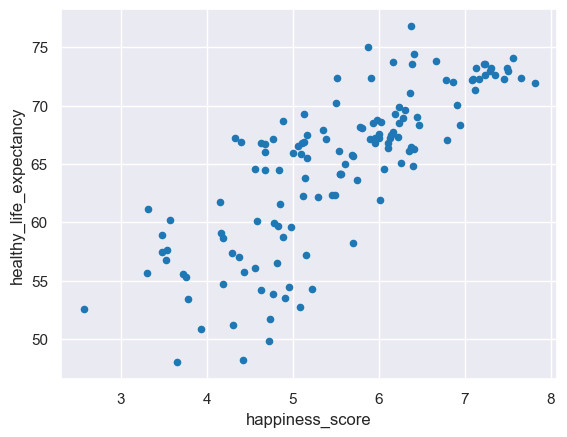

In [58]:
country_features.plot(x="happiness_score", y="healthy_life_expectancy", kind="scatter")

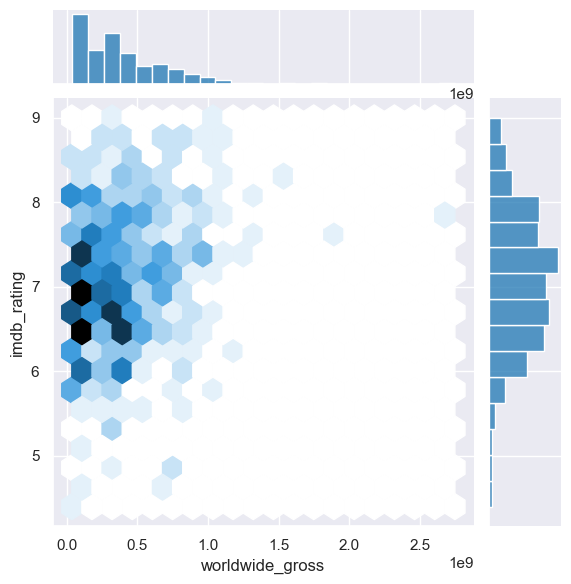

In [59]:
sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex")

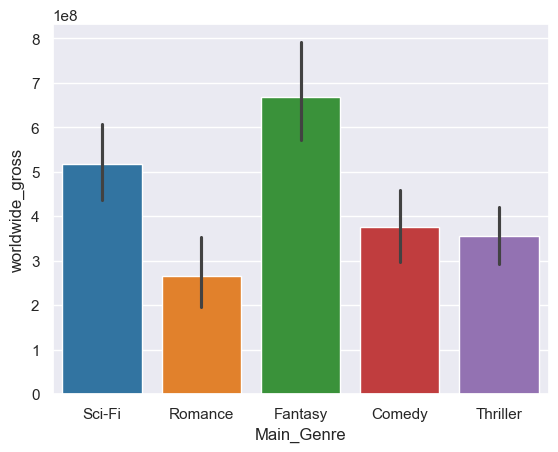

In [60]:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", hue="Main_Genre",
                 data=movies.loc[movies['Main_Genre'].isin(['Thriller', 'Comedy',
                                                            'Fantasy', 'Sci-Fi', 'Romance'])])

Text(0, 0.6, 'Number of movies')

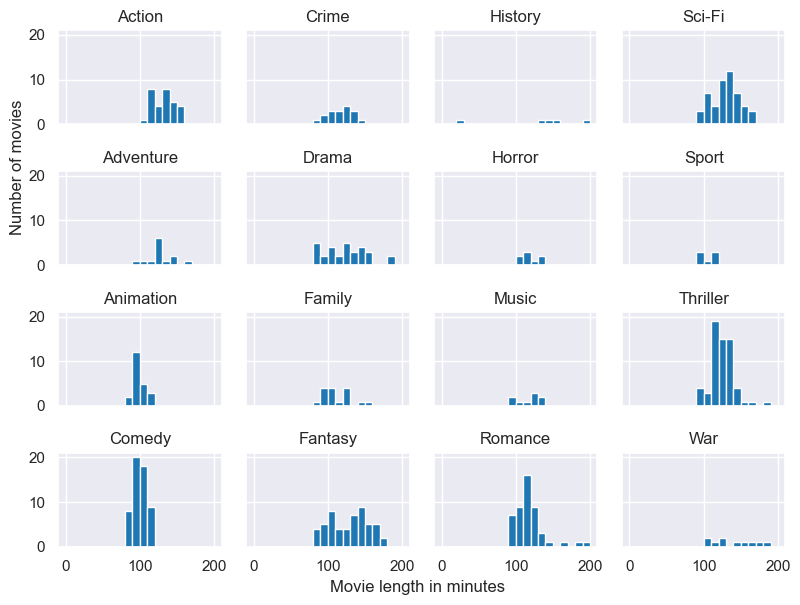

In [61]:
stats_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({
    'length': x['length'].values
}))
# Write your code to make 4x4 panel here

fig, ax = plt.subplots(4, 4, figsize=(8, 6), sharey=True, sharex=True)

for i in range(16):
    sbplt = ax[i % 4, math.floor(i / 4)]
    sbplt.hist(stats_by_genre.iloc[i].values, range=[0, 200], bins=20)
    sbplt.set_title(stats_by_genre.index[i])

fig.tight_layout()

fig.text(0.4, 0, "Movie length in minutes")
fig.text(0, 0.6, "Number of movies", rotation=90)

# 3 - Describing data

In [62]:
from statsmodels.stats import diagnostic
from scipy import stats

In [63]:
data_folder = '03 - Describing data/data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

### Distribution?

In [64]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist='norm')  #how about exponential? dist = 'exp'

(0.0637621121184162, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

### Correlation

In [65]:
stats.pearsonr(df['IncomePerCap'], df['Employed'])

PearsonRResult(statistic=0.2646136320394489, pvalue=9.942215354239015e-53)

There is a small (0.26), but significant (p < 0.05) positive correlation.

In [66]:
stats.spearmanr(df['IncomePerCap'], df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

significant (p < 0.05)

### Hypothesis testing

In [67]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

TtestResult(statistic=0.19788117232375713, pvalue=0.8434785239169611, df=118.0)

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### Bootstrapping

In [68]:
def bootstrap_confidence_interval(data, iterations=1000):
    """
    Bootstrap the 95% confidence interval for the mean of the data.

    Parameters:
    - data: An array of data
    - iterations: The number of bootstrap samples to generate

    Returns:
    - A tuple representing the lower and upper bounds of the 95% confidence interval
    """
    means = np.zeros(iterations)

    for i in range(iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = np.mean(bootstrap_sample)

    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)

    return (lower_bound, upper_bound)

# 4 - Regression Analysis

In [69]:
import statsmodels.formula.api as smf

In [70]:
data_folder = '04 - Regression analysis/data/'
df = pd.read_csv(data_folder + 'heart_failure_clinical_records_dataset.csv')

- Equations are specified using patsy formula syntax. Important operators are:
    1. `~` : Separates the left-hand side and right-hand side of a formula.
    2. `+` : Creates a union of terms that are included in the model.
    3. `:` : Interaction term.
    3. `*` : `a * b` is short-hand for `a + b + a:b`, and is useful for the common case of wanting to include all interactions between a set of variables.


- Intercepts are added by default.


- Categorical variables can be included directly by adding a term C(a).

### OLS
The Ordinary Least Squares (OLS) regression model is typically represented by the equation:

$$ y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \varepsilon $$

Where:
- $ y $ is the dependent variable.
- $ X_1, X_2, ..., X_n $ are the independent variables.
- $ \beta_0 $ is the y-intercept.
- $ \beta_1, \beta_2, ..., \beta_n $ are the coefficients of the independent variables.
- $ \varepsilon $ is the error term.

The goal of OLS regression is to minimize the sum of the squares of the differences between the observed values and the values predicted by the model. This is represented by the equation:

$$ \min \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:
- $ y_i $ are the observed values.
- $ \hat{y}_i $ are the predicted values.


In [71]:
# Declares the model
mod = smf.ols(formula='time ~ C(diabetes) + C(high_blood_pressure)', data=df)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()

# Print thes summary output provided by the library.
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.097
Date:                Thu, 04 Jan 2024   Prob (F-statistic):            0.00254
Time:                        18:51:28   Log-Likelihood:                -1718.9
No. Observations:                 299   AIC:                             3444.
Df Residuals:                     296   BIC:                             3455.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

- The dependent variable : time (number of days at the hospital)
- Method: The type of model that was fitted (OLS)
- Nb observations: The number of datapoints (299 patients)
- R2: The fraction of explained variance
- A list of predictors
- For each predictor: coefficient, standard error of the coefficients, p-value, 95% confidence intervals. We can see that only high blood pressure is a significant predictor (p = 0.001), while diabetes is not (0.584).
- Warnings if there are numerical issues (hopefully not!)

### Interpret the model

- Notice how C(diabetes)[T.1] is created based on the original diabetes feature. This means that the dummy variable is encoded such that the associated coefficient tells us about the value among the diabetes = yes subpopulation.


- We interpret the model in the following way: days at hospital = 139 + 4.9 * diabetes - 31.8 * high blood pressure. Thus:
    1. People who don't have diabetes nor high blood pressure stay at the hospital on average for 139 days
    2. People who have diabetes, but don't have blood pressure stay for 139 + 4.9 days ~ 144 days
    3. People who don't have diabetes, but have blood pressure stay for 139 - 31 days ~ 108 days
    4. People who have diabetes and blood pressure stay for 139 + 4.9 - 31.8 ~ 112 days

- We calculate the means explicitly to make sure they are the same as what we just calculated with regression!

In [72]:
# we use a*b to add terms: a, b, a:b, and intercept

mod = smf.ols(formula='time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)',
              data=df)  #https://patsy.readthedocs.io/en/latest/API-reference.html#patsy.Treatment

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     31.92
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           4.32e-22
Time:                        18:51:29   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3352.
Df Residuals:                     294   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

#### What is reference=0

**Treatment Coding:** The Treatment coding is a specific way to handle categorical variables. It creates dummy variables that represent comparisons of each level of the categorical variable to a reference category.

**Reference Category:** By specifying `Treatment(reference=0)`, you're telling the model which category of the `DEATH_EVENT` variable should be treated as the baseline or reference. All other categories will be compared to this reference category. Here, `0` is likely representing a specific category in the `DEATH_EVENT` variable, probably indicating cases where the event didn't occur (if `DEATH_EVENT` is a binary variable like 0 for 'no event' and 1 for 'event').

In summary, `C(DEATH_EVENT, Treatment(reference=0))` tells the model to treat `DEATH_EVENT` as a categorical variable, to compare each category of `DEATH_EVENT` to the reference category (presumably the category represented by 0), and to create the appropriate dummy variables for these comparisons.


### Interpretation with interaction term

- This model lets us see that death is associated with a lower number of days spent at the hospital.
- Notice how R2 is much larger compared to the previous model: more variance in the data is explained.
- Those that have high blood pressure stay for less time (-26 days on average), those who have blood pressure __and__ die spend 110 days less hospitalized on average, although this is not statistically significant.

### Standardization
The standardization formula is:

$$ Z = \frac{(X - \mu)}{\sigma} $$

Where:

- $Z$ is the standardized value.
- $X$ is the original value.
- $\mu$ is the mean of the data.
- $\sigma$ is the standard deviation of the data.



In [73]:
# how we standardize the countinuous variables
df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['creatinine_phosphokinase'] = (df['creatinine_phosphokinase'] - df['creatinine_phosphokinase'].mean()) / df[
    'creatinine_phosphokinase'].std()
df['ejection_fraction'] = (df['ejection_fraction'] - df['ejection_fraction'].mean()) / df['ejection_fraction'].std()
df['platelets'] = (df['platelets'] - df['platelets'].mean()) / df['platelets'].std()
df['serum_creatinine'] = (df['serum_creatinine'] - df['serum_creatinine'].mean()) / df['serum_creatinine'].std()
df['serum_sodium'] = (df['serum_sodium'] - df['serum_sodium'].mean()) / df['serum_sodium'].std()

### Logistic Regression
Logistic Regression is used for binary classification problems and models the probability that an observation belongs to one of the two categories. The logistic regression model is represented by the logistic function:

$$ P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}} $$

Where:
- $ P(Y=1) $ is the probability that the dependent variable $ Y $ is in the category labeled as 1.
- $ X_1, X_2, ..., X_n $ are the independent variables.
- $ \beta_0, \beta_1, \beta_2, ..., \beta_n $ are the coefficients of the model.
- $ e $ is the base of natural logarithms.

The logistic function outputs values between 0 and 1, which can be interpreted as probabilities. The decision of which category to assign an observation to is then made based on a threshold value, typically 0.5.


In [74]:
# logit is logistic regression. The other parameters are the same as before
mod = smf.logit(formula='DEATH_EVENT ~  age + creatinine_phosphokinase + ejection_fraction + \
                        platelets + serum_creatinine + serum_sodium + \
                        C(diabetes) + C(high_blood_pressure) +\
                        C(sex) + C(anaemia) + C(smoking) + C(high_blood_pressure)', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.2160
Time:                        18:51:31   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1633      0.362     -3.214      0.001   

#### Access variables programmatically

In [75]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()

,0,1
Intercept,-1.872683,-0.453819
C(diabetes)[T.1],-0.431428,0.734243
C(high_blood_pressure)[T.1],-0.180976,1.018851
C(sex)[T.1],-1.086628,0.288599
C(anaemia)[T.1],-0.171894,1.007753
C(smoking)[T.1],-0.547629,0.818807
age,0.356256,0.968609
creatinine_phosphokinase,0.010320,0.553497
ejection_fraction,-1.177018,-0.487482
platelets,-0.379319,0.240561


#### Plots predictors

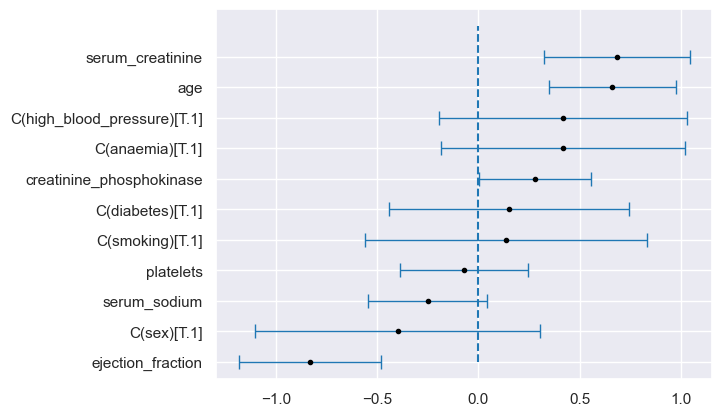

In [76]:
#sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

# in this case, we index starting from the first element, not to plot the intercept

# we will use standard errors, instead of CIs
# two standard errors approximate the CIs (you can actually see in the summary table that
# +/2 SI is equivalent to the CIs)

#fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr=2 * np.array(l3), linewidth=1,
             linestyle='none', marker='o', markersize=3,
             markerfacecolor='black', markeredgecolor='black', capsize=5)

plt.vlines(0, 0, len(l1), linestyle='--')

plt.yticks(range(len(l2)), l2);

### Interpretation of logit predictors:
- Serum creatinine level in the blood and age are significant positive predictors of death.
- High ejection fraction (a healthy heart) is a sigificant negative predictor of death.
- Since all predictors are standardized, we can interpret in the following way:
    - When all other predictors take mean values, an increase of age by 1 standard deviation, leads on average to an increase by 0.66 of log odds of death.
    - When all other predictors take mean values, increase of ejection fraction by 1 standard deviation, leads on average to a  decrease by 0.83 of log odds of death.

#### Log odds converter functions

In [77]:
def p_to_log_odds(p):
    return np.log(p / (1 - p))


def log_odds_to_p(odds):
    return np.exp(odds) / (1 + np.exp(odds))

### Log regression

In [78]:
df["logtime"] = np.log(df["time"])
mod = smf.ols(formula='logtime ~  high_blood_pressure + diabetes + DEATH_EVENT', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                logtime   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     55.05
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.75e-28
Time:                        18:51:36   Log-Likelihood:                -325.52
No. Observations:                 299   AIC:                             659.0
Df Residuals:                     295   BIC:                             673.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.9891    

`high_blood_pressure` is associated with an multiplicative coefficient of around -0.22. This means that, in the model, whenever a patient has high blood pressure we multiply his or her outcome by $e^{-0.22} \simeq 0.80$.

# 5 - Causal analysis of observational data

In [79]:
import networkx as nx

In [88]:
data_folder = '05 - Causal analysis of observational data/data/'
lalonde_data = pd.read_csv(data_folder + 'lalonde.csv')
treated = lalonde_data.loc[lalonde_data['treat'] == 1]  #People that attained the programme
control = lalonde_data.loc[lalonde_data['treat'] == 0]  #People that didn't attain the programme

### Pairplots to viz data

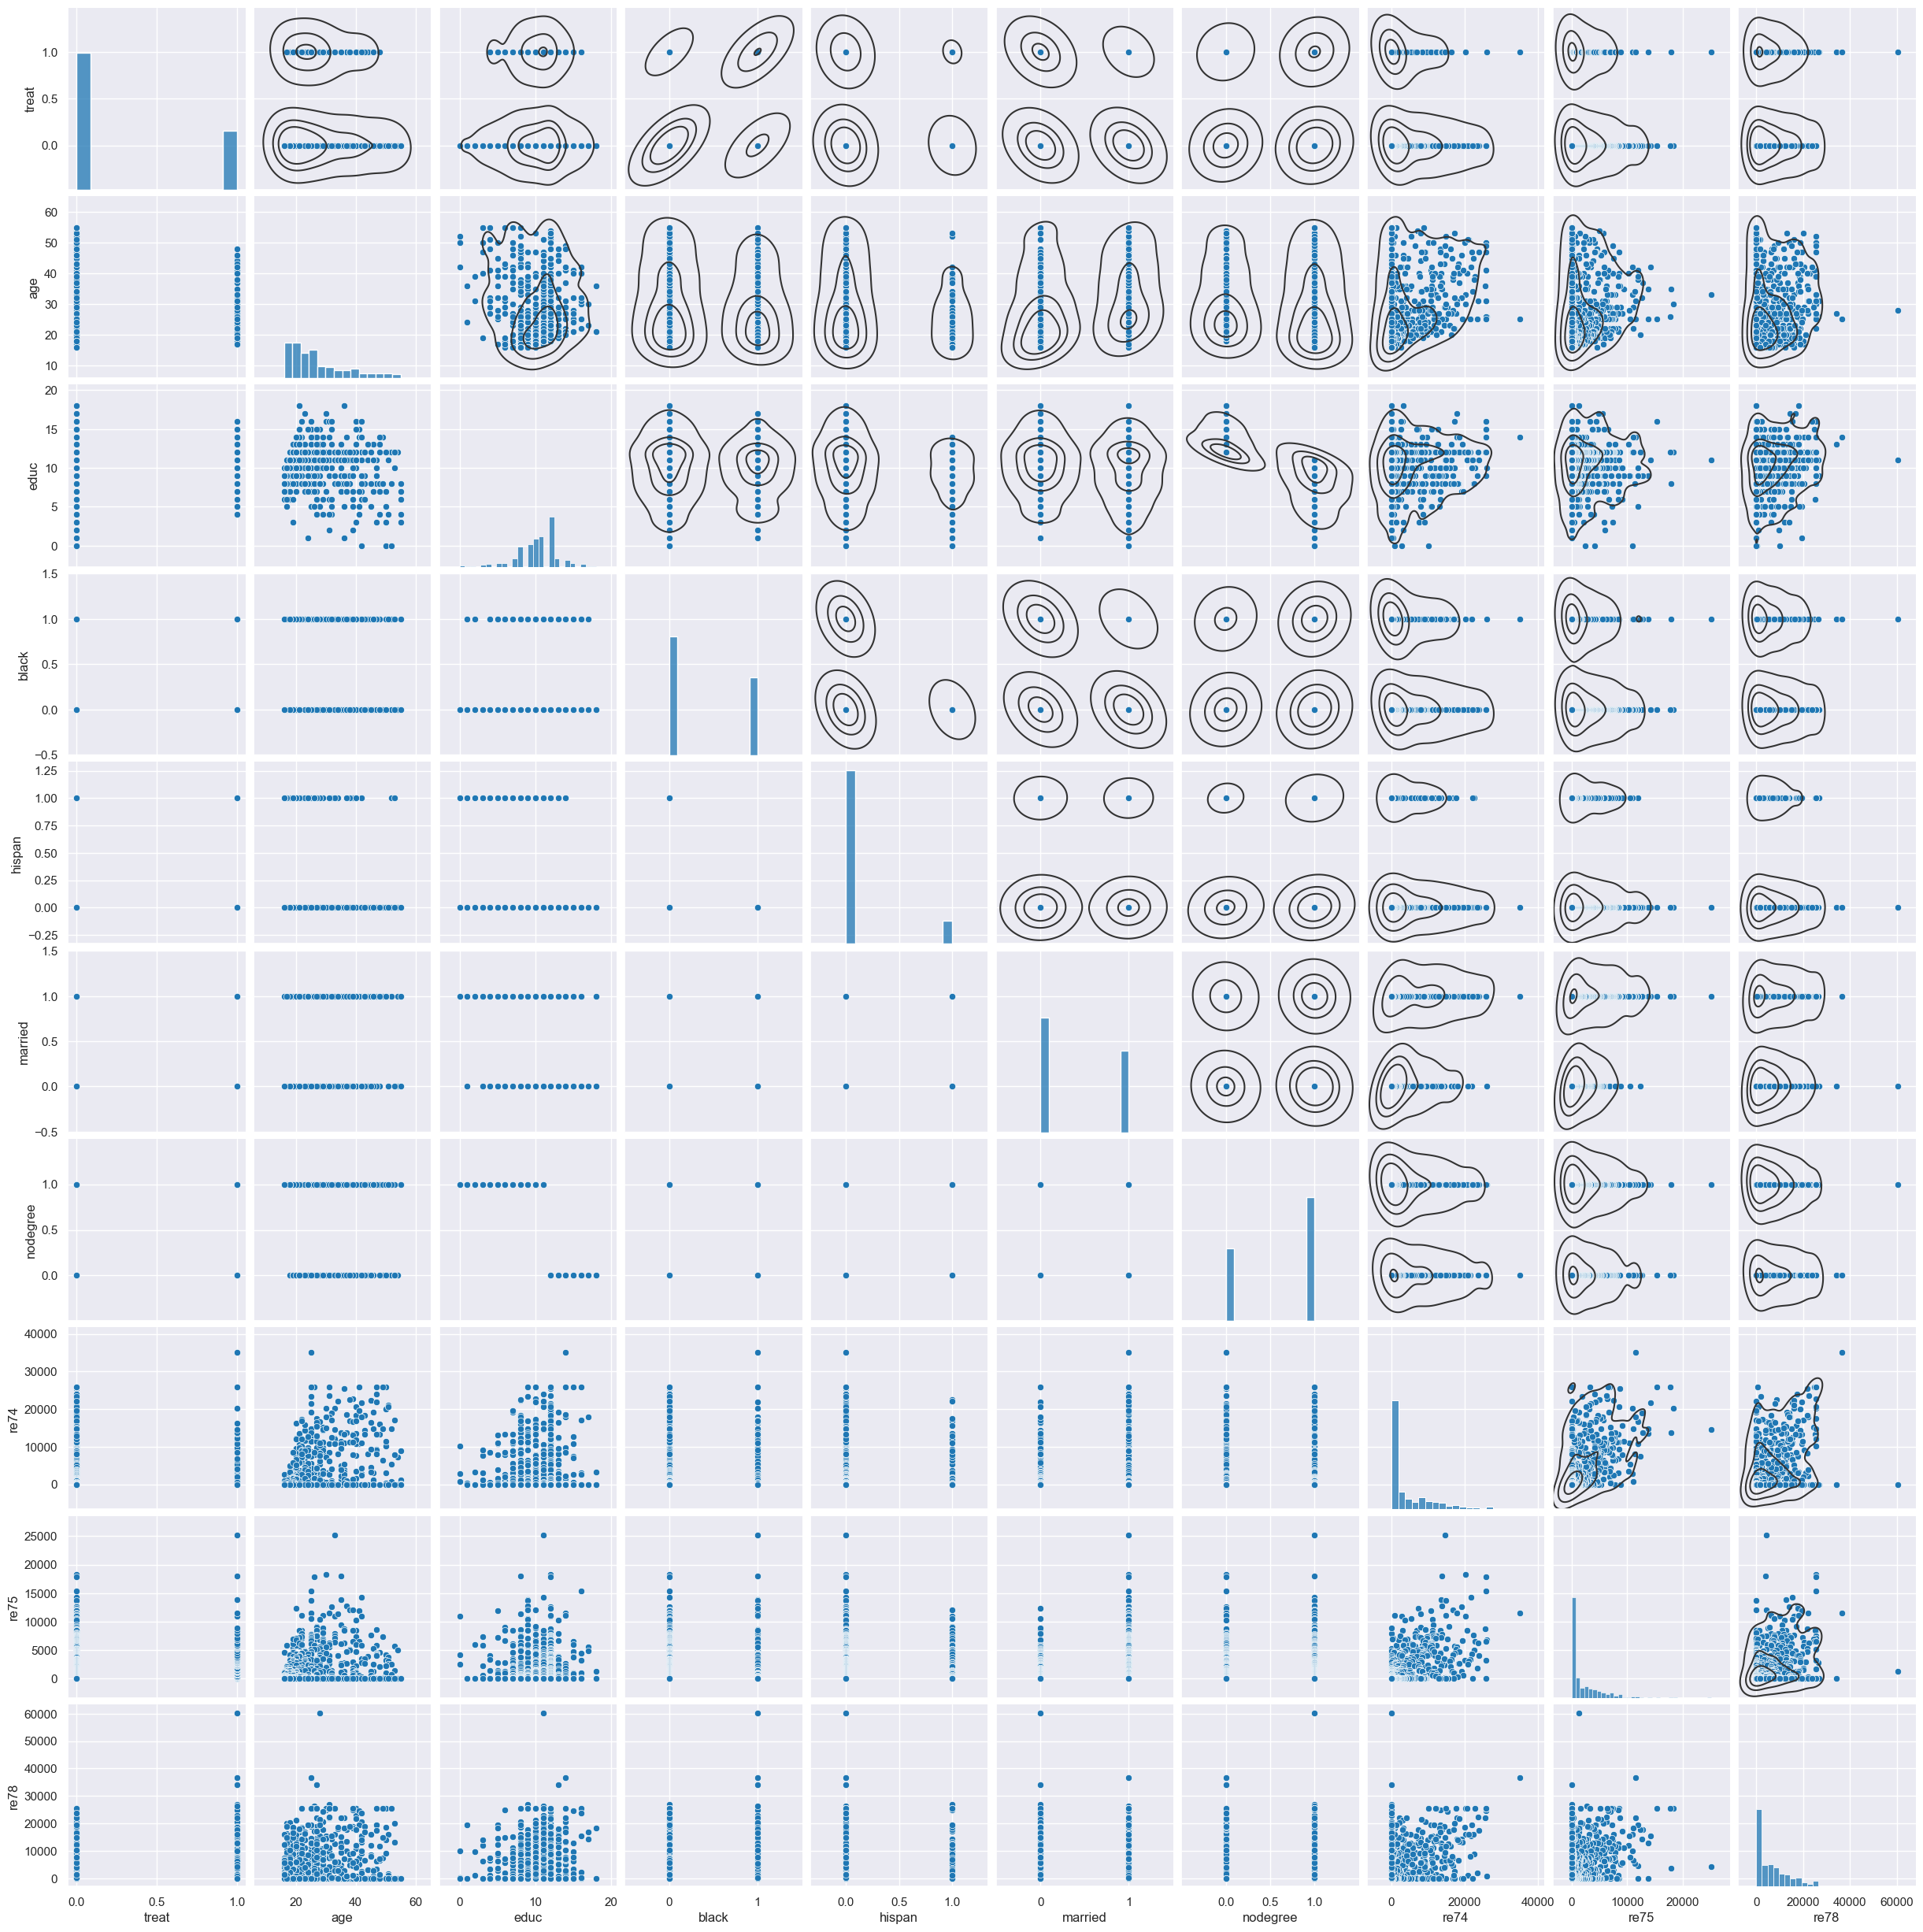

In [85]:
g = sns.pairplot(lalonde_data, diag_kind="hist")
g.map_upper(sns.kdeplot, levels=4, color=".2")

#### Boxplot to see the repartition of perk of a category

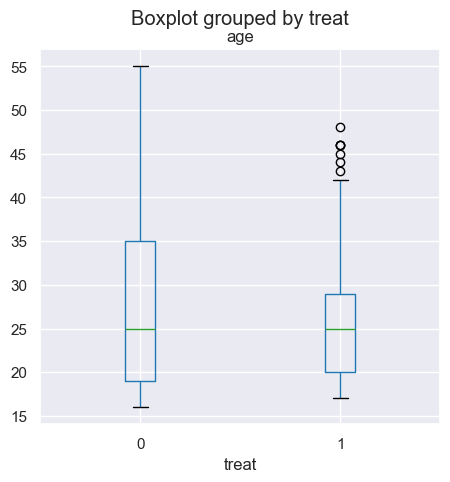

In [86]:
# Age -- quite different, the members of the treated tend
# to be younger than the ones in the control group

lalonde_data.boxplot(by='treat', column='age', figsize=[5, 5], grid=True)
plt.show()

#### Histplot to see a distribution

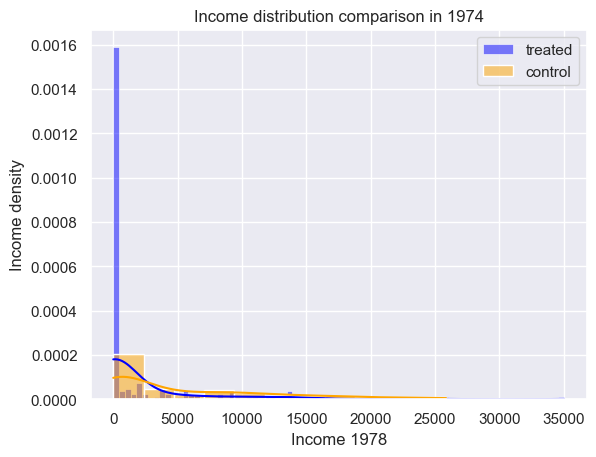

In [89]:
ax = sns.histplot(treated['re74'], stat='density', kde=True, color='blue', label='treated');
ax = sns.histplot(control['re74'], stat='density', kde=True, color='orange', label='control')
ax.set(title='Income distribution comparison in 1974', xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

We need to see that the data is not "well" distributed among the two different group

#### Barplots

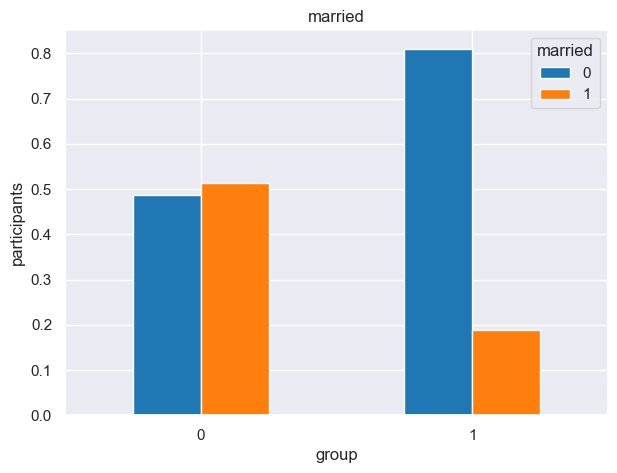

In [92]:
#mariage

group = lalonde_data.groupby(['treat', 'married'])['married'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7, 5], rot=0)
pl.set_title('married')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()
# The percentage of unmarried people between
# the treated group is much higher than the married ones whereas
# in the control group, the two categories are balanced. This might
# be an indication of what type of people are included in
# the program.

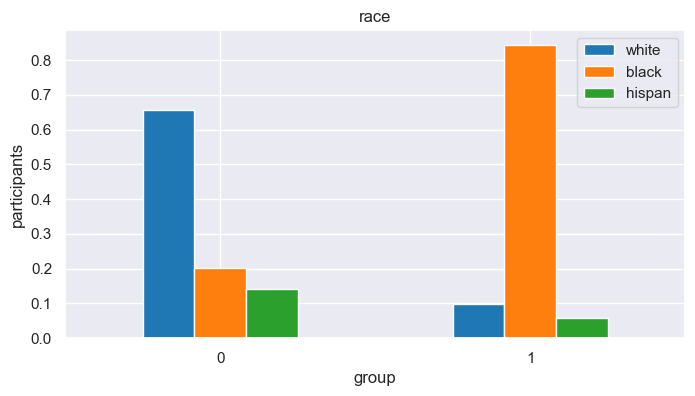

In [93]:
# race

lalonde_data['white'] = (~(lalonde_data['black'].astype(bool) \
                           | lalonde_data['hispan'].astype(bool))).astype(bool)

lalonde_data_group = lalonde_data.groupby(lalonde_data.treat)[['white', 'black', 'hispan']].sum()
lalonde_data_group = lalonde_data_group.div(lalonde_data_group.sum(axis=1), axis=0)
pl = lalonde_data_group.plot(kind='bar', figsize=[8, 4], rot=0)
pl.set_title('race')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

# white outnumber the other races in the control group, and on the
# other hand, in the treated group the proportion of black is almost
# the only one

### Propensity score model
We use logistic regression to estimate propensity scores for all points in the dataset.
Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).

In [94]:
# let's standardize the continuous features
lalonde_data['age'] = (lalonde_data['age'] - lalonde_data['age'].mean()) / lalonde_data['age'].std()
lalonde_data['educ'] = (lalonde_data['educ'] - lalonde_data['educ'].mean()) / lalonde_data['educ'].std()
lalonde_data['re74'] = (lalonde_data['re74'] - lalonde_data['re74'].mean()) / lalonde_data['re74'].std()
lalonde_data['re75'] = (lalonde_data['re75'] - lalonde_data['re75'].mean()) / lalonde_data['re75'].std()

mod = smf.logit(formula='treat ~  age + educ + C(black) + C(hispan)  + C(married) + C(nodegree) + \
        +re74 + re75', data=lalonde_data)

res = mod.fit()

# Extract the estimated propensity scores
lalonde_data['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.3508
Time:                        19:13:07   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8509      0.350     -8.147      0.000      -3.537      -2.165
C(black)[T.

### Balancing the dataset via matching
Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

Wanting to minimize the difference of propensity scores between pairs, we define the similarity function between two instances $x$ and $y$ like:

$$ similarity(x,y) = 1 - | propensity\_score(x) - propensity\_score(y) |$$
This function captures the difference in scores like a distance, but since the distance defined like that would always be between 0 and 1, subtracting it from 1 would be a meaningful measure to use for similarity.

In [95]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1 - np.abs(propensity_score1 - propensity_score2)


# Separate the treatment and control groups
treatment_df = lalonde_data[lalonde_data['treat'] == 1]
control_df = lalonde_data[lalonde_data['treat'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():
        """if (control_row['black'] == treatment_row['black'])\
            and (control_row['hispan'] == treatment_row['hispan'])"""  #NEED TO ADD THIS CONDITION if we want to improve matching

        # Calculate the similarity
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [96]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_df_1 = lalonde_data.iloc[matched]

In [97]:
treated = balanced_df_1.loc[balanced_df_1['treat'] == 1]  #People that attained the program
control = balanced_df_1.loc[balanced_df_1['treat'] == 0]  #People that didn't attain the program

In [98]:
treated.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [99]:
control.re78.describe()

count      185.000000
mean      5454.776050
std       6063.836916
min          0.000000
25%          0.000000
50%       3358.873000
75%       7933.914000
max      23764.800000
Name: re78, dtype: float64

# 6 - Supervised learning

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge

In [4]:
data = pd.read_csv('06 - Learning from data - Supervised learning/data/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Visualize relashionship

<Axes: xlabel='newspaper', ylabel='sales'>

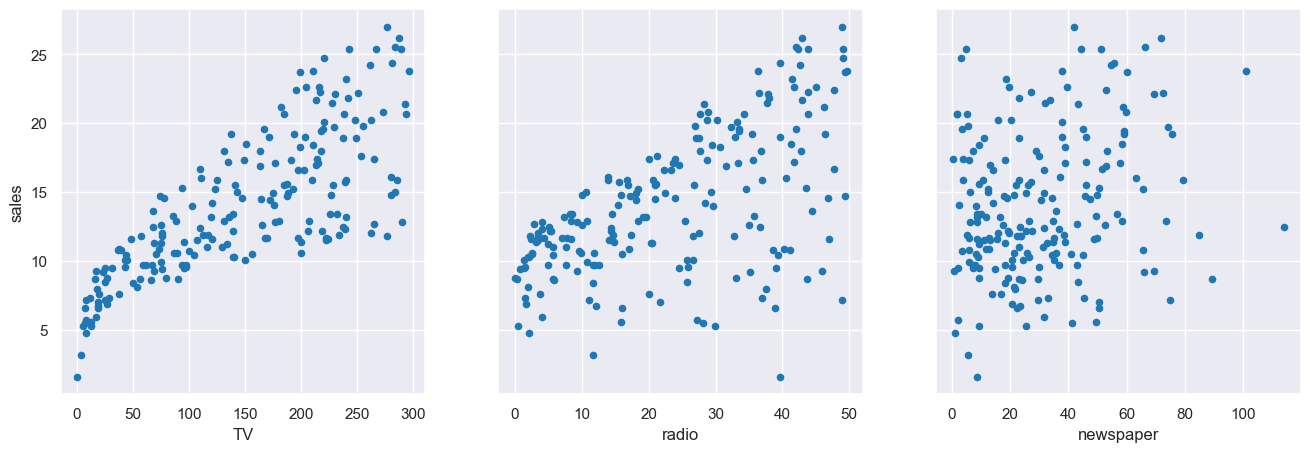

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 5), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)

### How we predict?

<img src="06 - Learning from data - Supervised learning/img/estimating_coefficients.png">
What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction:
<img src="06 - Learning from data - Supervised learning/img/slope_intercept.png">

### Linear Regression

In [6]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

LinearRegression()

In [7]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(round(lin_reg.coef_[f], 4), feature_cols[f]))
print(lin_reg.intercept_)

0.0458 * TV + 
0.1885 * radio + 
-0.001 * newspaper + 
2.9388893694594067


#### Cross-validation
Cross-validation is a statistical method used to estimate the skill of machine learning models. It is commonly used in linear regression to assess how well a model will generalize to an independent dataset. Here's a brief overview:

### Cross-Validation in Linear Regression:

#### What is Cross-Validation?
- **Cross-validation** involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set).
- The goal is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset.

#### How is it Done?
1. **K-Fold Cross-Validation**:
   - The most common form of cross-validation is *k-fold cross-validation*.
   - The data set is divided into k subsets, and the holdout method is repeated k times. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set.
   - The error estimation is averaged over all k trials to get the total effectiveness of the model.

2. **Leave-One-Out Cross-Validation (LOOCV)**:
   - In LOOCV, the model is trained on all data points except one and the model is tested on that single excluded data point.
   - This is repeated such that each data point in the sample is used once as the test set.
   - LOOCV is computationally expensive but provides a comprehensive use of all data points.

#### Benefits:
- Provides more accurate estimate of model prediction performance.
- Reduces the variance of a single trial of a train/test split.

#### Considerations:
- More computationally expensive than using a single train/test split.
- Choice of k in k-fold cross-validation can impact the bias-variance tradeoff.


### Plot prediction with original data

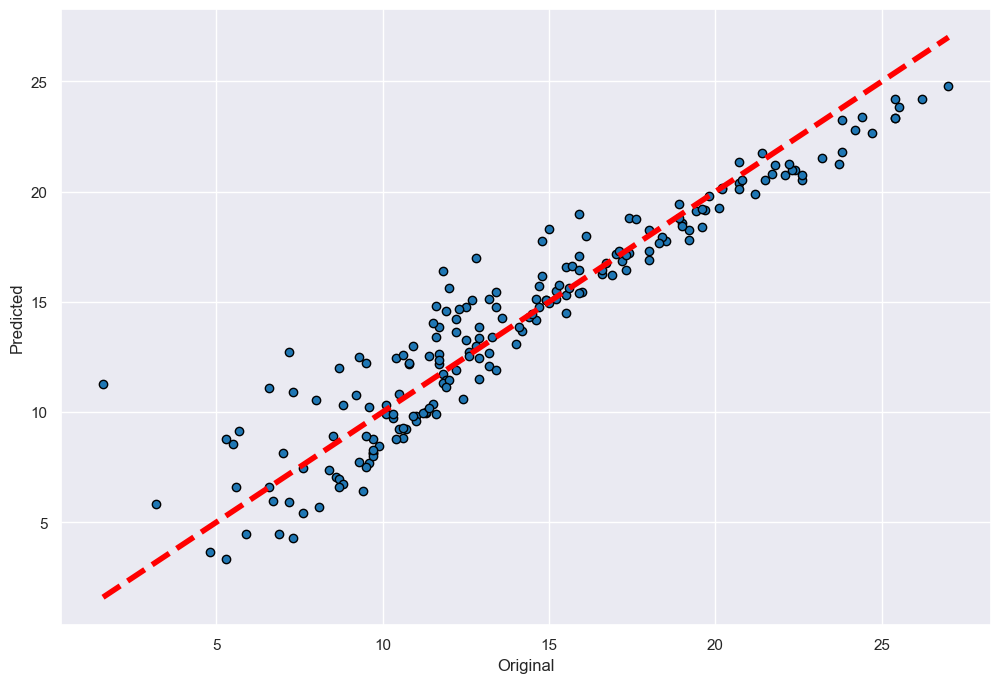

3.0729465971002106

In [11]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()
mean_squared_error(y, predicted)

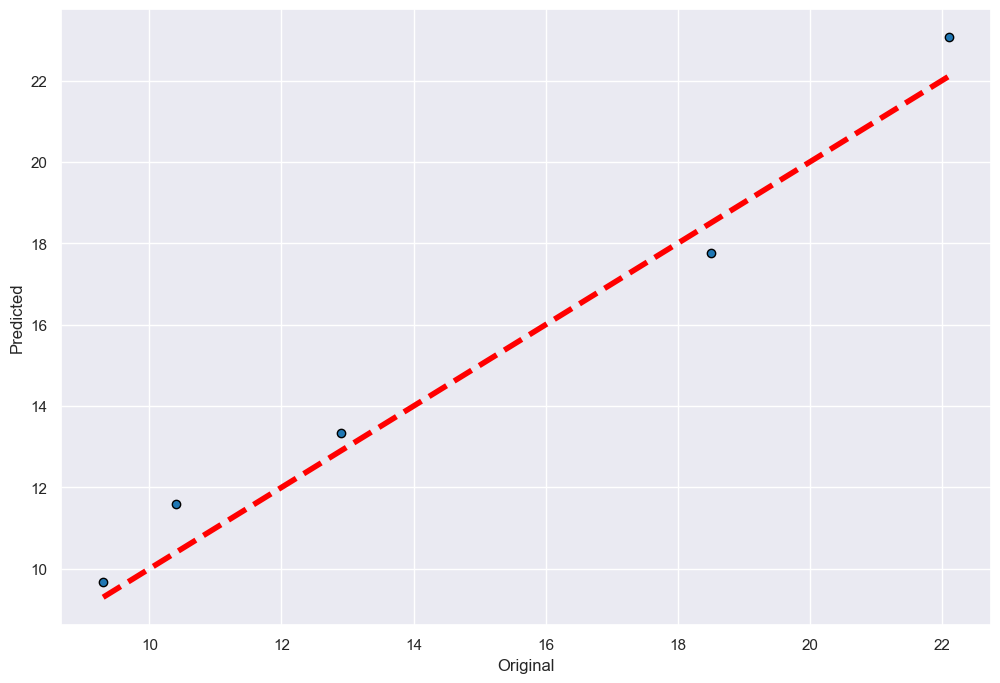

0.6442462580572467

In [16]:
ridge = Ridge(alpha=6)
X = X[:5]
y = y[:5]
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(ridge, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()
mean_squared_error(y, predicted)

### Logistic regression